<a href="https://colab.research.google.com/github/Fabriciome/Tarefas-Awari/blob/main/Modelo_machine_learning_Mercado_Livre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importação de pacotes e módulos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor

In [2]:
SEED = 42 # semente aleatória

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Fabriciome/Tarefas-Awari/main/dados_tratados_mercado_livre.csv')

In [4]:
df.head()

,aluguel,zona,area,quarto
0,2000.0,sul,51.0,2.0
1,2700.0,sul,72.0,3.0
2,3200.0,sul,59.0,1.0
3,1300.0,sul,70.0,2.0
4,1800.0,sul,90.0,2.0


In [5]:
#dividindo os dados em X e y
X = df.drop('aluguel', axis=1)
y = df['aluguel']

In [6]:
X.head()

,zona,area,quarto
0,sul,51.0,2.0
1,sul,72.0,3.0
2,sul,59.0,1.0
3,sul,70.0,2.0
4,sul,90.0,2.0


In [7]:
y.head()

0    2000.0
1    2700.0
2    3200.0
3    1300.0
4    1800.0
Name: aluguel, dtype: float64

In [8]:
#Fazendo o one hot encoding das variáveis categóricas de Zona
X['zona'].unique()

array(['sul', 'norte', 'leste', 'oeste'], dtype=object)

In [9]:
X = pd.get_dummies(X)

In [10]:
#Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        train_size=0.8, 
                                                        random_state=SEED)

# Fazendo a transformação para log + 1 dos dados de treino

In [11]:
X_treino = np.log1p(X_treino)
y_treino = np.log1p(y_treino)

# Usando um modelo de base (baseline)

In [12]:
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_treino, y_treino)
y_pred_base = baseline.predict(np.log1p(X_teste))

In [13]:
print('O R² do modelo de base que sempre prevê a média é:', baseline.score(np.log1p(X_teste), np.log1p(y_teste)))

O R² do modelo de base que sempre prevê a média é: -0.03211908827516674


# Aplicando um modelo de Regressão Linear

In [14]:
reg = LinearRegression()
reg.fit(X_treino, y_treino)
y_pred = reg.predict(np.log1p(X_teste))

In [18]:
reg.score(np.log1p(X_teste), np.log1p(y_teste)) 

0.5236190100056416

In [21]:
r2_score(np.log1p(y_teste), y_pred)

0.5236190100056416

# Aplicando um modelo de KNN (K vizinhos mais próximos)

In [25]:
knn = KNeighborsRegressor()

In [26]:
knn # hiperparâmetros

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [27]:
knn.fit(X_treino, y_treino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [29]:
y_pred_knn = knn.predict(np.log1p(X_teste))

## Comparando as métricas entre KNN e Regressão Linear

In [30]:
print('Métricas do KNN com 5 vizinhos')
print('O R² foi:' , knn.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred_knn))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred_knn))

Métricas do KNN com 5 vizinhos
O R² foi: 0.4735675878641813
O MAE foi: 0.30152437788837694
O MSE foi: 0.1560865530265582


In [31]:
print('Métricas da Regressão Linear')
print('O R² foi:' , reg.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred))

Métricas da Regressão Linear
O R² foi: 0.5236190100056416
O MAE foi: 0.2976915211685337
O MSE foi: 0.14124636884329


# Aplicando um modelo de Árvore de Decisão

In [32]:
dt = DecisionTreeRegressor(max_depth=3,)
dt.fit(X_treino, y_treino)
y_pred_dt = dt.predict(np.log1p(X_teste))

## Visualizando a Árvore de Decisão

In [33]:
X_treino.columns

Index(['area', 'quarto', 'zona_leste', 'zona_norte', 'zona_oeste', 'zona_sul'], dtype='object')

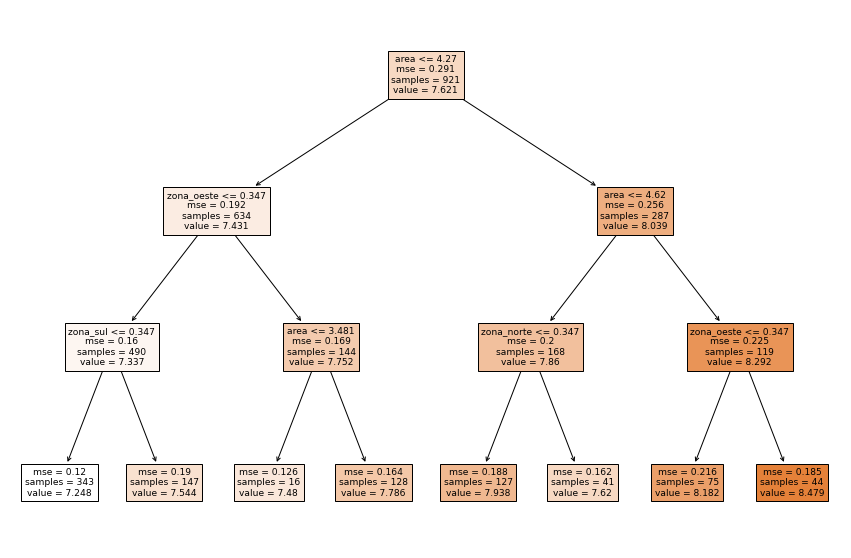

In [34]:
plt.figure(figsize=(15, 10))

plot_tree(dt, feature_names=X_treino.columns, filled=True);

In [35]:
for feature in zip(X_treino.columns, dt.feature_importances_):
  print(feature)
  print('---')

('area', 0.7206907280850541)
---
('quarto', 0.0)
---
('zona_leste', 0.0)
---
('zona_norte', 0.02585659646484082)
---
('zona_oeste', 0.17880613300915127)
---
('zona_sul', 0.07464654244095398)
---


In [37]:
print('Métricas da Árvore de Decisão')
print('O R² foi:' , dt.score(np.log1p(X_teste), np.log1p(y_teste)))
print('O MAE foi:' , mean_absolute_error(np.log1p(y_teste), y_pred_dt))
print('O MSE foi:' , mean_squared_error(np.log1p(y_teste), y_pred_dt))

Métricas da Árvore de Decisão
O R² foi: 0.46387050180464207
O MAE foi: 0.3125897013290683
O MSE foi: 0.15896172693785768


# Aplicando o modelo Random Forest Regressor nos dados

In [39]:
rfr = RandomForestRegressor(random_state=SEED)

# Usando o score de validação cruzada para escolher um modelo

In [40]:
cv_base = cross_val_score(baseline, X_treino, y_treino)
cv_reg = cross_val_score(reg, X_treino, y_treino)
cv_knn = cross_val_score(knn, X_treino, y_treino)
cv_dt = cross_val_score(dt, X_treino, y_treino)
cv_rfr = cross_val_score(rfr, X_treino, y_treino)

In [41]:
cv_base

array([-0.00316362, -0.0015287 , -0.00596767, -0.03298775, -0.01158619])

In [42]:
cvs = [cv_base, cv_reg, cv_knn, cv_dt, cv_rfr]

for cv, pontuacoes in enumerate(cvs):
  print(f'{cv}: {np.mean(pontuacoes):.2f}')

0: -0.01
1: 0.46
2: 0.41
3: 0.40
4: 0.37


## Usando a busca em grade com validação cruzada (Grid Search CV) para o Random Forest Regressor

In [43]:
parametros = {'max_depth': [5, 10, 30, 20],
              'n_estimators': [100, 200, 150, 110]}

In [44]:
gs = GridSearchCV(rfr, parametros, cv=5, scoring='r2', verbose=2)

In [45]:
gs.fit(X_treino, y_treino)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=100 ...................................
[CV] .................... max_depth=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] .................... max_depth=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] .................... max_depth=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] .................... max_depth=5, n_estimators=200, total=   0.3s
[CV] max_depth=5, n_estimators=200 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   21.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [46]:
gs.best_score_

0.4521121360565788

In [47]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [48]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [50]:
resultados_gs = pd.DataFrame(gs.cv_results_)

In [51]:
resultados_gs.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.225823,0.007646,0.011238,0.000331,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.502099,0.468864,0.321878,0.499131,0.468589,0.452112,0.066667,1
3,0.170774,0.005952,0.010151,0.000743,5,110,"{'max_depth': 5, 'n_estimators': 110}",0.499954,0.469496,0.323204,0.501783,0.464599,0.451807,0.066077,2
1,0.296997,0.006968,0.014887,0.000108,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.502824,0.468775,0.322238,0.497793,0.465837,0.451493,0.066317,3
0,0.148463,0.002400,0.008919,0.000834,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.500861,0.467442,0.321483,0.500066,0.465184,0.451007,0.066543,4
4,0.184601,0.011022,0.011705,0.001815,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.486412,0.367295,0.264072,0.413945,0.420188,0.390383,0.073692,5


In [56]:
rfr_escolhido = RandomForestRegressor(max_depth=5, 
                                   n_estimators=200, 
                                   random_state=SEED)

In [57]:
rfr_escolhido.fit(X_treino, y_treino)
y_pred_rfr_escolhido = rfr_escolhido.predict(X_teste)
print('O R² final do Random Forest após a busca de hiperparâmetros e a validação cruzada é:', rfr_escolhido.score(np.log1p(X_teste), np.log1p(y_teste)))

O R² final do Random Forest após a busca de hiperparâmetros e a validação cruzada é: 0.5510090410338664


# Salvando o modelo

In [58]:
import pickle

In [59]:
pickle.dump(rfr_escolhido, open('modelo_rfr.pkl', 'wb'))

In [60]:
modelo_final = pickle.load(open('modelo_rfr.pkl', 'rb'))

In [61]:
modelo_final.score(np.log1p(X_teste), np.log1p(y_teste))

0.5510090410338664